In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2021-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2021_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7440,동래구,10125,동래구,2685,36.09%,"8,783"
1,2021-01-07,간장,오복왕표 0.9ℓ 1병,6350,동래구,6900,동래구,550,8.66%,"6,625"
2,2021-01-07,갈치,60cm정도 500g 1마리(냉동),15800,동래구,16600,동래구,800,5.06%,"16,200"
3,2021-01-07,고등어,30㎝정도 500g 1마리,4000,동래구,4900,동래구,900,22.5%,"4,450"
4,2021-01-07,달걀,오경슈퍼란60g정도 10개,2980,동래구,3180,동래구,200,6.71%,"3,080"
5,2021-01-07,닭고기,육계 1.0㎏,6280,동래구,8100,동래구,1820,28.98%,"7,190"
6,2021-01-07,대파,1.0㎏,4600,동래구,6414,동래구,1814,39.43%,"5,507"
7,2021-01-07,돼지고기,삼겹살 500g,6900,동래구,8000,동래구,1100,15.94%,"7,450"
8,2021-01-07,두부,500g 판두부(국산포장두부 420g) 1모,4550,동래구,5194,동래구,644,14.15%,"4,872"
9,2021-01-07,라면,신라면 120g 1봉지,676,동래구,676,동래구,0,0.0%,676


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2021-04-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2021_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-04-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",3800,동래구,10125,동래구,6325,166.45%,"6,963"
1,2021-04-08,간장,오복왕표 0.9ℓ 1병,6350,동래구,6980,동래구,630,9.92%,"6,665"
2,2021-04-08,갈치,60cm정도 500g 1마리(냉동),11200,동래구,15800,동래구,4600,41.07%,"13,500"
3,2021-04-08,달걀,오경슈퍼란60g정도 10개,3680,동래구,3780,동래구,100,2.72%,"3,730"
4,2021-04-08,닭고기,육계 1.0㎏,5580,동래구,8600,동래구,3020,54.12%,"7,090"
5,2021-04-08,대파,1.0㎏,7128,동래구,8580,동래구,1452,20.37%,"7,854"
6,2021-04-08,돼지고기,삼겹살 500g,6900,동래구,11000,동래구,4100,59.42%,"8,950"
7,2021-04-08,두부,500g 판두부(국산포장두부 420g) 1모,5100,동래구,5194,동래구,94,1.84%,"5,147"
8,2021-04-08,라면,신라면 120g 1봉지,676,동래구,676,동래구,0,0.0%,676
9,2021-04-08,맥주,하이트 500㎖ 1병,1410,동래구,1450,동래구,40,2.84%,"1,430"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2021-07-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2021_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-07-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7450,동래구,8175,동래구,725,9.73%,"7,813"
1,2021-07-08,간장,오복왕표 0.9ℓ 1병,6500,동래구,6900,동래구,400,6.15%,"6,700"
2,2021-07-08,갈치,60cm정도 500g 1마리(냉동),11000,동래구,15468,동래구,4468,40.62%,"13,234"
3,2021-07-08,고등어,30㎝정도 500g 1마리,4000,동래구,5750,동래구,1750,43.75%,"4,875"
4,2021-07-08,달걀,오경슈퍼란60g정도 10개,3880,동래구,4280,동래구,400,10.31%,"4,080"
5,2021-07-08,닭고기,육계 1.0㎏,6780,동래구,8900,동래구,2120,31.27%,"7,840"
6,2021-07-08,대파,1.0㎏,2650,동래구,3138,동래구,488,18.42%,"2,894"
7,2021-07-08,돼지고기,삼겹살 500g,10900,동래구,14900,동래구,4000,36.7%,"12,900"
8,2021-07-08,두부,500g 판두부(국산포장두부 420g) 1모,5100,동래구,5194,동래구,94,1.84%,"5,147"
9,2021-07-08,라면,신라면 120g 1봉지,676,동래구,676,동래구,0,0.0%,676


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2021-10-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2021_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-10-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5940,동래구,6450,동래구,510,8.59%,"6,195"
1,2021-10-07,간장,오복왕표 0.9ℓ 1병,6900,동래구,6980,동래구,80,1.16%,"6,940"
2,2021-10-07,갈치,60cm정도 500g 1마리(냉동),9900,동래구,15800,동래구,5900,59.6%,"12,850"
3,2021-10-07,고등어,30㎝정도 500g 1마리,3933,동래구,4000,동래구,67,1.7%,"3,967"
4,2021-10-07,달걀,오경슈퍼란60g정도 10개,3880,동래구,4280,동래구,400,10.31%,"4,080"
5,2021-10-07,닭고기,육계 1.0㎏,5066,동래구,8900,동래구,3834,75.68%,"6,983"
6,2021-10-07,대파,1.0㎏,3300,동래구,3683,동래구,383,11.61%,"3,492"
7,2021-10-07,돼지고기,삼겹살 500g,12750,동래구,15400,동래구,2650,20.78%,"14,075"
8,2021-10-07,두부,500g 판두부(국산포장두부 420g) 1모,5100,동래구,5194,동래구,94,1.84%,"5,147"
9,2021-10-07,라면,신라면 120g 1봉지,736,동래구,736,동래구,0,0.0%,736


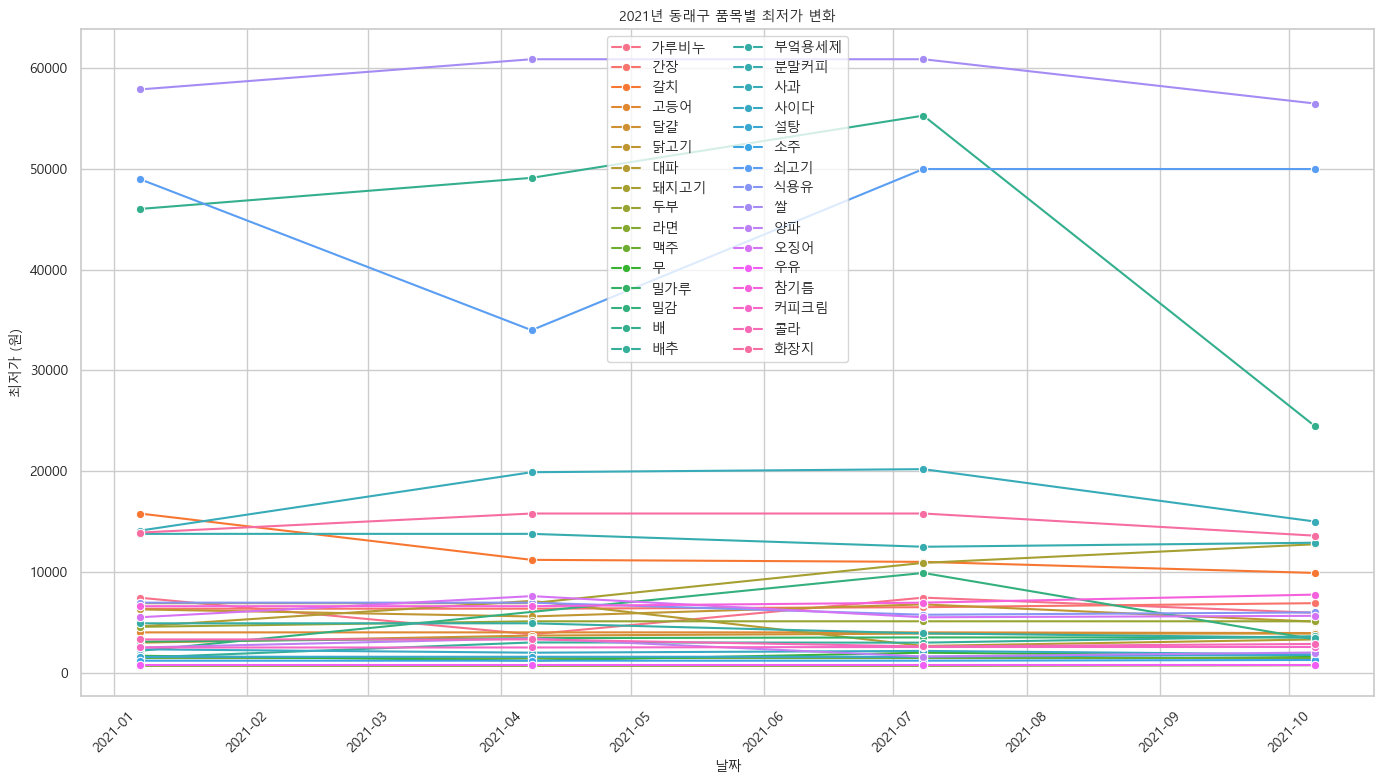

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2021_1q.csv")
q2 = pd.read_csv("동래구2021_2q.csv")
q3 = pd.read_csv("동래구2021_3q.csv")
q4 = pd.read_csv("동래구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 동래구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("동래구2021_min.csv", index=False, encoding="utf-8-sig")

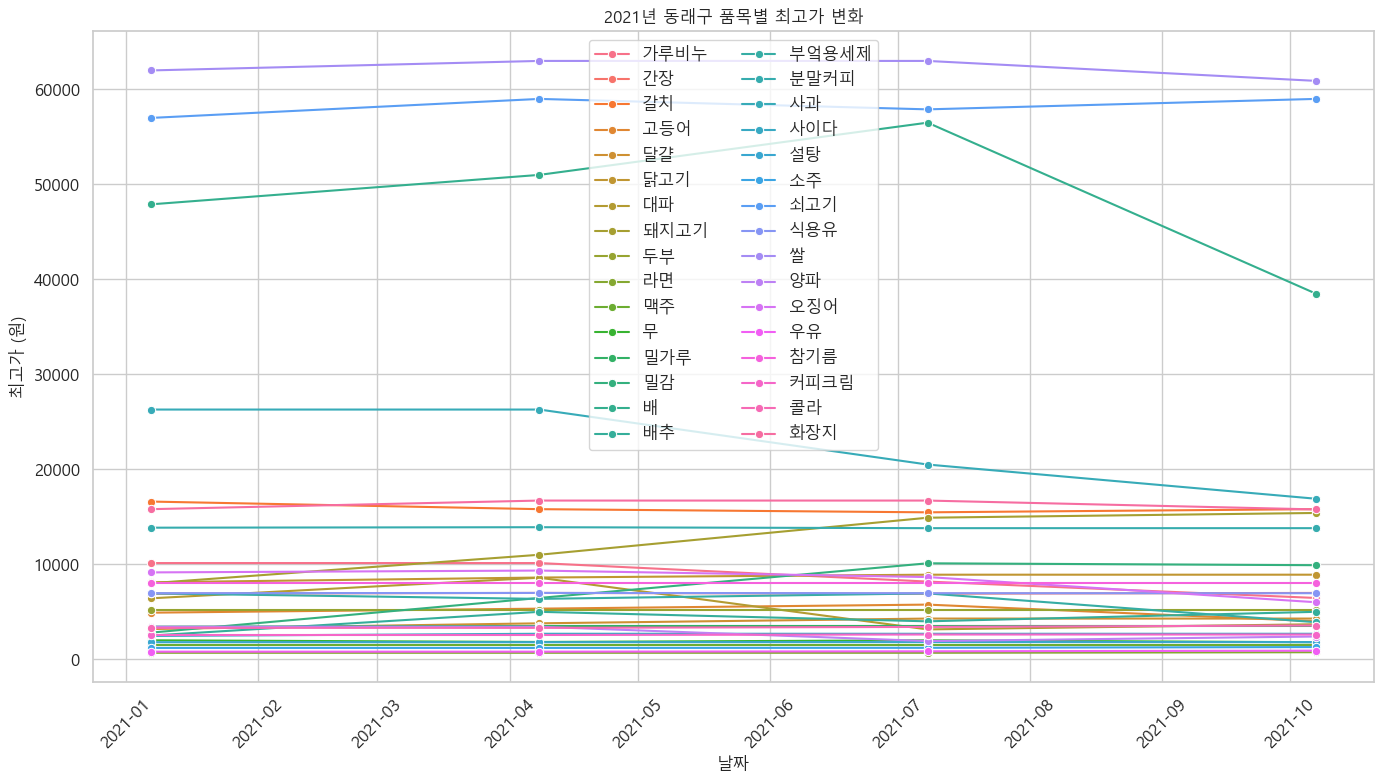

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2021_1q.csv")
q2 = pd.read_csv("동래구2021_2q.csv")
q3 = pd.read_csv("동래구2021_3q.csv")
q4 = pd.read_csv("동래구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 동래구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("동래구2021_max.csv", index=False, encoding="utf-8-sig")